In [ ]:
import re

In [ ]:
#使用match函数匹配**起始位置**是否存在子集,有则通过span返回范围
print(re.match('www','www.baidu.com').span())
print(re.match('ww.b','www.baidu.com'))

In [ ]:
#使用search函数匹配**第一个**子集,有则通过span返回范围
print(re.search('www','www.baidu.com').span())
print(re.search('ww.b','www.baidu.com').span())

## re.match和re.search的区别
- match是从头开始匹配,匹配失败则放弃
- search是检索完整个字符串,直到找到一个匹配的

In [ ]:
#match方法例子

line = 'Cats are smarter than dogs'
matchobj = re.match(r'dogs',line,re.M|re.I)
if matchobj:
    print('match-->matchobj.group():',matchobj.group())
else:
    print('No match!!')

In [ ]:
#search方法例子

line = 'Cats are smarter than dogs'
matchobj = re.search(r'dogs',line,re.M|re.I)
if matchobj:
    print('search-->matchobj.group():',matchobj.group())
else:
    print('No match!!')

In [ ]:
#  #号+所有+$末尾
phone = '2021-999-888 # 这是一个奇奇怪怪的电话号码'
num = re.sub(r'#.*$',"",phone)
print('电话号码是:',num)

In [ ]:
# \D为非数字
num = re.sub(r'\D','',phone)
print('电话号码是:',num)

In [ ]:
#将匹配到的数字乘以2
def double(matched):
    value = int(matched.group('value'))
    return str(value *2)
s = 'A23G4HFD567'
# 不加+则每个数字单独区分
print(re.sub('(?P<value>\d)',double,s))
print(re.sub('(?P<value>\d+)',double,s))

In [ ]:
#匹配最少一个数字
pattern = re.compile(r'\d+')
#从3号位置开始匹配
m = pattern.match('one12twothree34four',3,10)  
print(m)


In [ ]:
#match后提取数据常用函数
print("m.group: ",m.group(0))
print("m.start: ",m.start(0))
print("m.end: ",m.end(0))
print("m.span: ",m.span(0))

## 将正则匹配到的数据以常见类型返回

In [ ]:
# findall函数,将匹配到的子串返回列表

#查找至少一个数字
pattern = re.compile(r'\d+') 
result1 = pattern.findall('blue 123 google 456')
result2 = pattern.findall('bbb88uuu123google456',0,10)
print(result1)
print(result2)

In [ ]:
# finditer函数,将匹配到的子串作为迭代器返回

#处理的结果会根据正则要求分离
it = re.finditer(r'\d+','12a32bc43jf3')
for match in it:
    print(match.group())

In [ ]:
# split方法直接对匹配到的子串返回列表
re.split('a','hello world')

In [ ]:
from lxml import etree

## 百度网站的网页解析-实战1

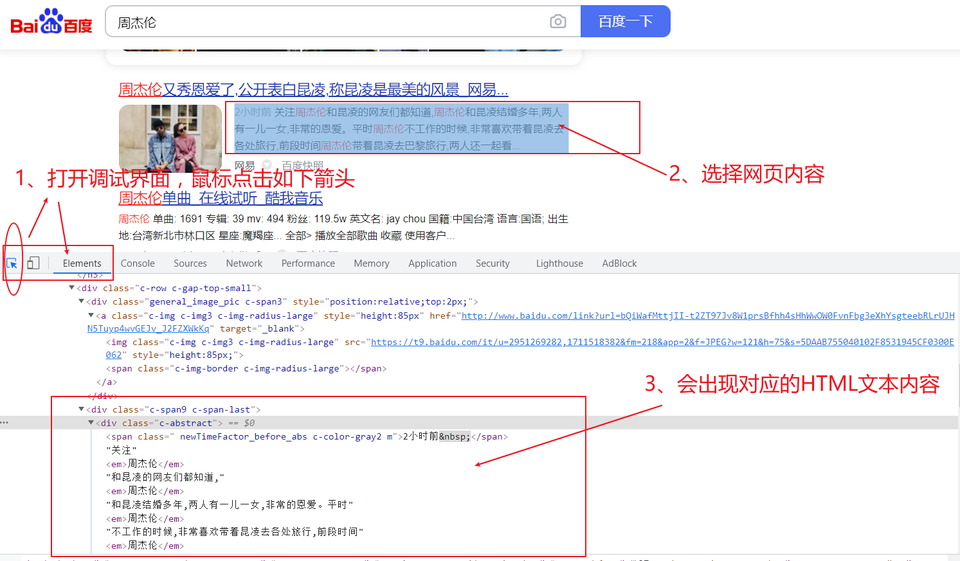

In [ ]:
import requests

In [ ]:
headers = {
    'User-Agent' :"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0"
}
params = {
    'wd':'周杰伦'
}
r = requests.get(url='https://www.baidu.com/s?',headers=headers,params=params)

In [ ]:
html = etree.HTML(r.text)

In [ ]:
result = html.xpath('//*[@id="6"]/div/div[2]/div[1]')
print(result)

In [ ]:
result = html.xpath('//*[@id="6"]/div/div[2]/div[1]/text()')
print(result)
#转化成str格式
print(''.join(result))

In [ ]:
result = html.xpath('//*[@id="6"]/div/div[2]/div[1]/span/text()')

#转化成str格式
print(''.join(result))
print(re.sub('小时前','',''.join(result)))

## Task3 - 作业

目标网站： http://123.meibp.com/tag/%e6%af%8f%e6%97%a5%e7%83%ad%e7%82%b9%e5%85%b3%e9%94%ae%e8%af%8d

目标：只需要能够正常提取出来既可以，并在Makrdown运行后，截图出运行内容既可

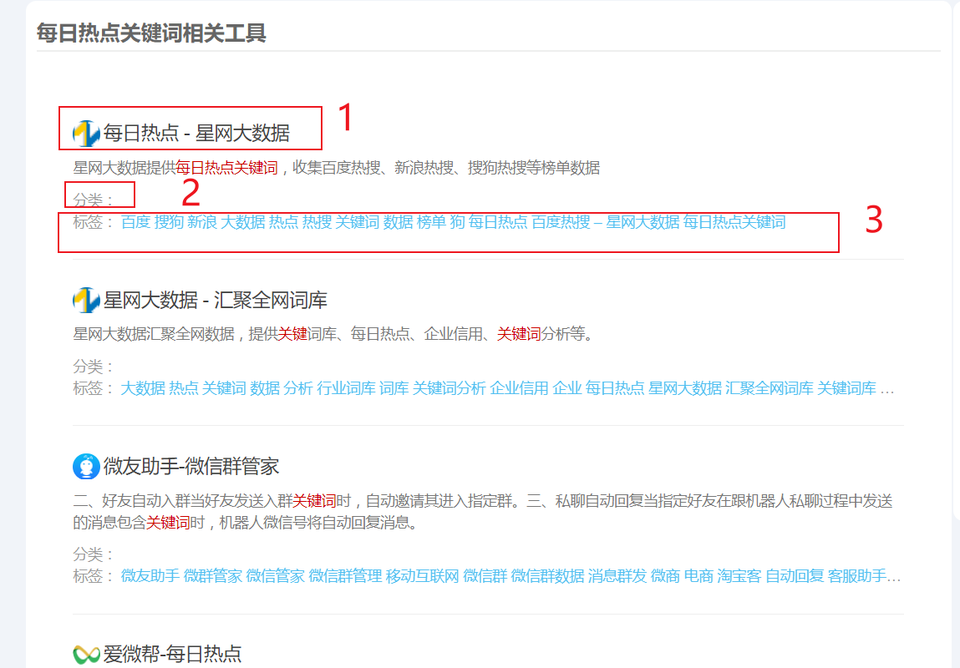

In [1]:
import requests
from lxml import etree

In [24]:
headers = {
    'User-Agent' :"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:93.0) Gecko/20100101 Firefox/93.0"
}
r = requests.get(url='http://123.meibp.com/tag/%e6%af%8f%e6%97%a5%e7%83%ad%e7%82%b9%e5%85%b3%e9%94%ae%e8%af%8d',headers=headers)

<Element html at 0x1e348c5b800>
标题:   每日热点 - 星网大数据
分类： 
标签: ['百度', '搜狗', '新浪', '大数据', '热点', '热搜', '关键词', '数据', '榜单', '狗', '每日热点', '百度热搜', '–', '星网大数据', '每日热点关键词']


In [4]:
zy = etree.HTML(r.text)
print(zy)

<Element html at 0x1e348c835c0>


In [23]:
zy_result1 = zy.xpath('//*[@id="hot"]/div/div/article[1]/header/h2/a/text()')
print('标题:',''.join(zy_result1))
zy_result2 = zy.xpath('//*[@id="hot"]/div/div/article[1]/span[1]/span/text()')
print(''.join(zy_result2))
zy_result3=zy.xpath(f'//*[@id="hot"]/div/div/article[1]/span[2]/span/a/text()')
print("标签:",zy_result3)

标题:   每日热点 - 星网大数据
分类： 
标签: ['百度', '搜狗', '新浪', '大数据', '热点', '热搜', '关键词', '数据', '榜单', '狗', '每日热点', '百度热搜', '–', '星网大数据', '每日热点关键词']
